In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import os
import PIL
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
with open('data/train.p', mode = 'rb') as training_data:
    train = pickle.load(training_data)
with open('data/valid.p', mode = 'rb') as validation_data:
    valid = pickle.load(validation_data)
with open('data/test.p', mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

1

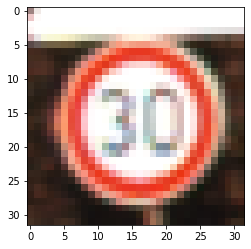

In [6]:
i = 3000
plt.imshow(X_train[i])
y_train[i]

7

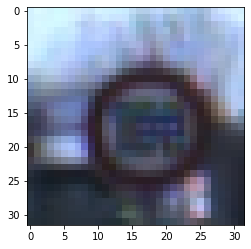

In [7]:
i = 3000
plt.imshow(X_validation[i])
y_validation[i]

11

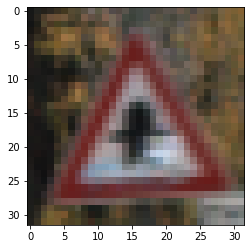

In [8]:
i = 3000
plt.imshow(X_test[i])
y_test[i]

In [9]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [10]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray = np.sum(X_validation/3, axis=3, keepdims=True)

In [11]:
X_train_gray.shape

(34799, 32, 32, 1)

In [12]:
X_test_gray.shape

(12630, 32, 32, 1)

In [13]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [14]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [15]:
X_train_gray_norm

array([[[[-0.75260417],
         [-0.7734375 ],
         [-0.80729167],
         ...,
         [-0.88020833],
         [-0.8828125 ],
         [-0.87239583]],

        [[-0.78125   ],
         [-0.7734375 ],
         [-0.79947917],
         ...,
         [-0.875     ],
         [-0.87239583],
         [-0.875     ]],

        [[-0.72395833],
         [-0.765625  ],
         [-0.82291667],
         ...,
         [-0.87760417],
         [-0.875     ],
         [-0.875     ]],

        ...,

        [[-0.8984375 ],
         [-0.90625   ],
         [-0.90625   ],
         ...,
         [-0.8984375 ],
         [-0.90625   ],
         [-0.90104167]],

        [[-0.8984375 ],
         [-0.90625   ],
         [-0.8984375 ],
         ...,
         [-0.90625   ],
         [-0.90885417],
         [-0.91145833]],

        [[-0.8984375 ],
         [-0.8984375 ],
         [-0.8828125 ],
         ...,
         [-0.90885417],
         [-0.91666667],
         [-0.91145833]]],


       [[[-0.41666667],


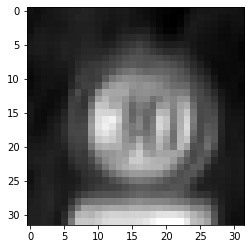

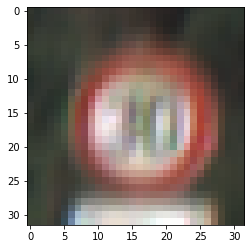

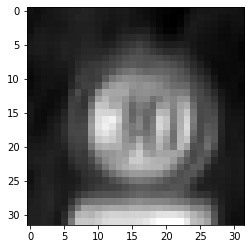

In [16]:
i = 60
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

In [17]:
from tensorflow.keras import datasets, layers, models

In [18]:
LeNet = models.Sequential()

LeNet.add(layers.Conv2D( 6, (5,5), activation = 'relu', input_shape = (32,32,1)))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Conv2D(16, (5,5), activation = 'relu'))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Flatten())

LeNet.add(layers.Dense(120,activation='relu'))

LeNet.add(layers.Dense(84,activation='relu'))

LeNet.add(layers.Dense(43,activation='softmax'))
LeNet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [19]:
LeNet.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [20]:
hist = LeNet.fit( X_train_gray_norm,
                y_train,
                batch_size = 500,
                epochs = 50,
                verbose = 1,
                validation_data = (X_validation_gray_norm, y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 4s 121us/sample - loss: 3.0239 - accuracy: 0.2116 - val_loss: 2.3785 - val_accuracy: 0.3735
Epoch 2/50
34799/34799 [==============================] - 1s 21us/sample - loss: 1.4174 - accuracy: 0.6078 - val_loss: 1.2650 - val_accuracy: 0.6315
Epoch 3/50
34799/34799 [==============================] - 1s 18us/sample - loss: 0.8140 - accuracy: 0.7691 - val_loss: 0.9500 - val_accuracy: 0.7070
Epoch 4/50
34799/34799 [==============================] - 1s 18us/sample - loss: 0.5962 - accuracy: 0.8354 - val_loss: 0.7883 - val_accuracy: 0.7846
Epoch 5/50
34799/34799 [==============================] - 1s 18us/sample - loss: 0.4756 - accuracy: 0.8719 - val_loss: 0.6793 - val_accuracy: 0.8057
Epoch 6/50
34799/34799 [==============================] - 1s 18us/sample - loss: 0.3958 - accuracy: 0.8957 - val_loss: 0.6973 - val_accuracy: 0.8048
Epoch 7/50
34799/34799 [==============================] 

In [21]:
score = LeNet.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test Accuracy: 0.8708630204200745


In [22]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [23]:
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

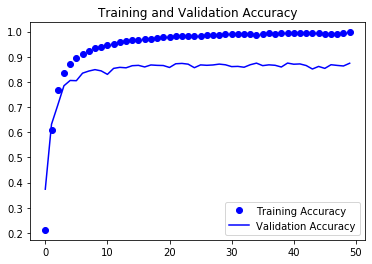

In [24]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

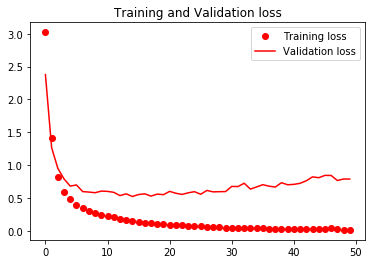

In [25]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss,'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [26]:
predicted_classes = LeNet.predict_classes(X_test_gray_norm)
y_true = y_test

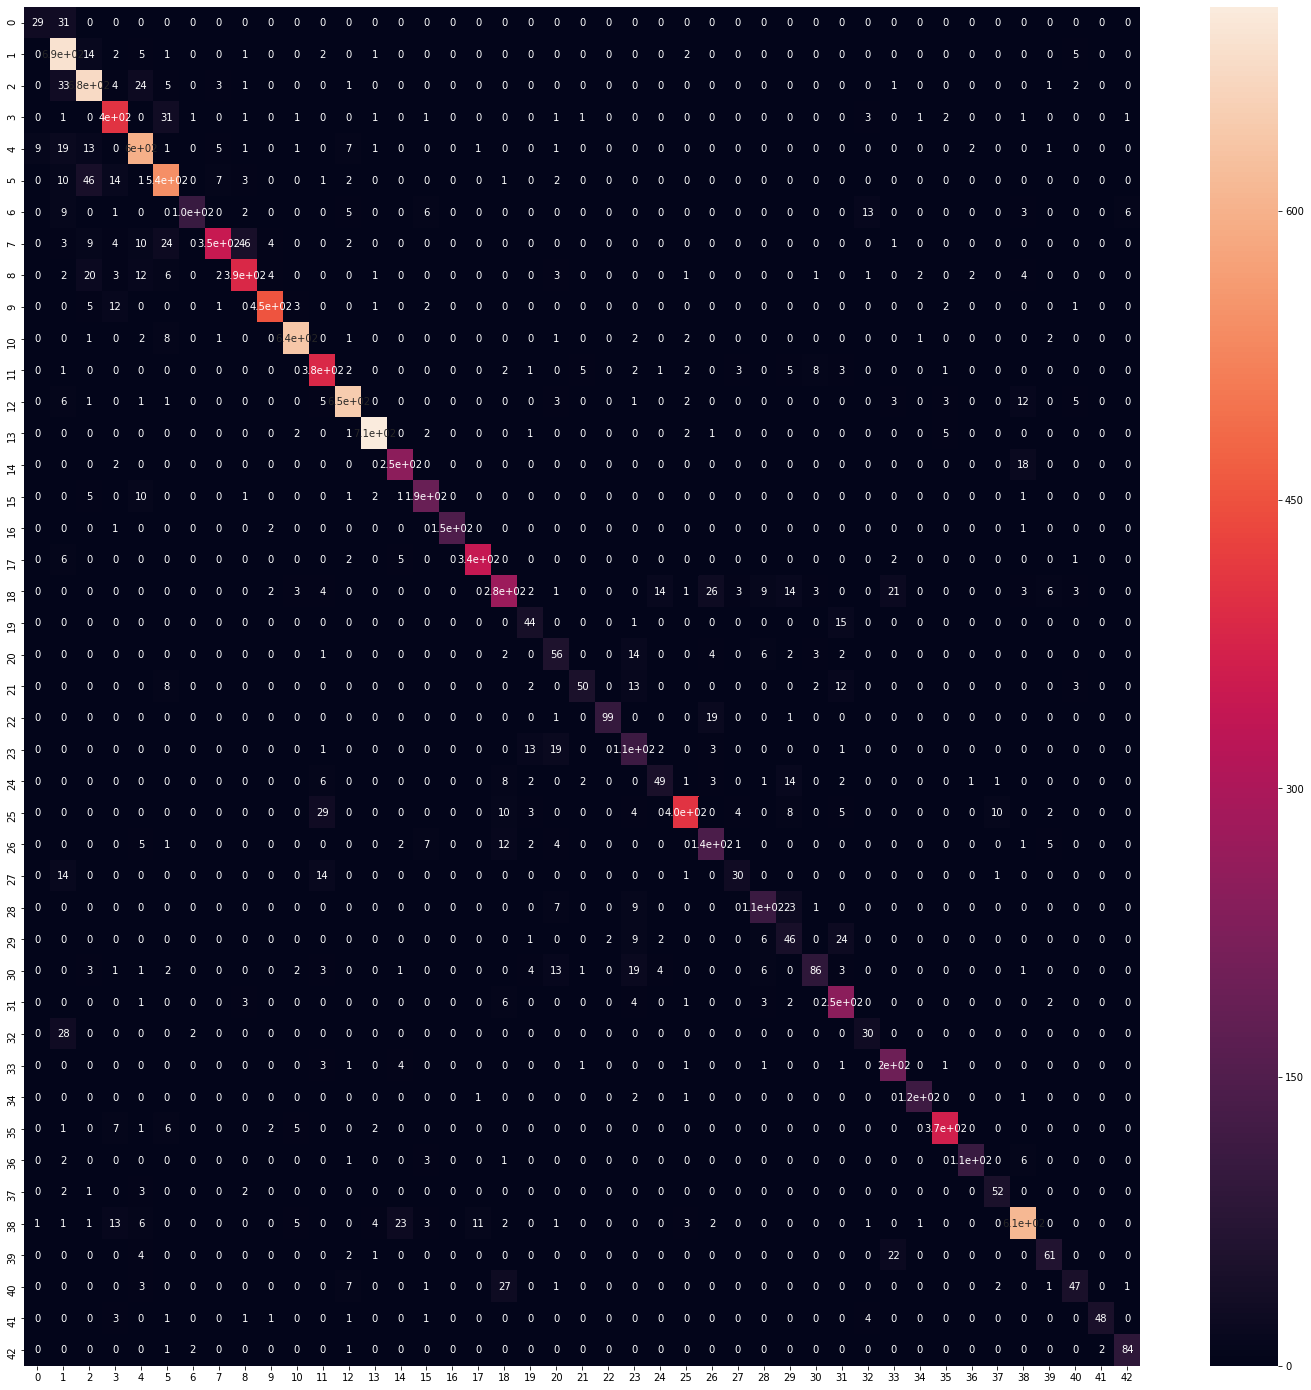

In [27]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(conf_mat, annot=True)

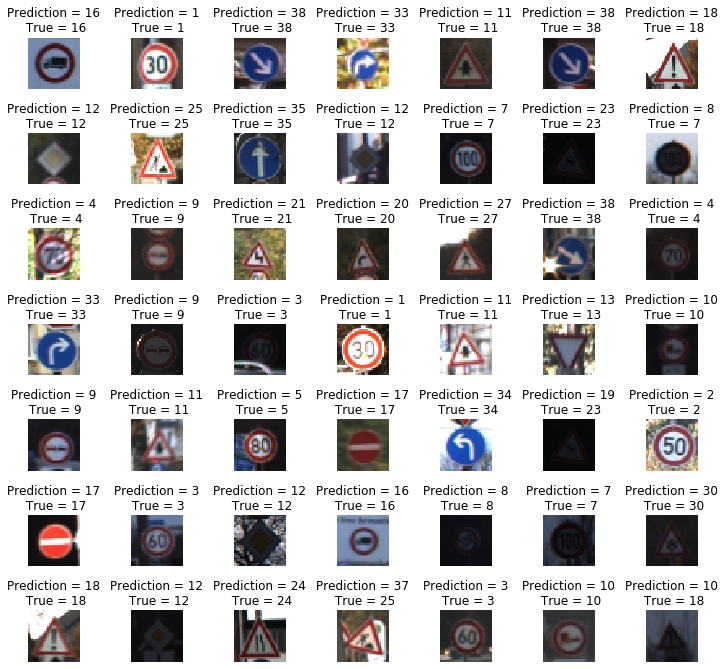

In [28]:
L = 7
W = 7

fig, axes = plt.subplots(L,W, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=1)